<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


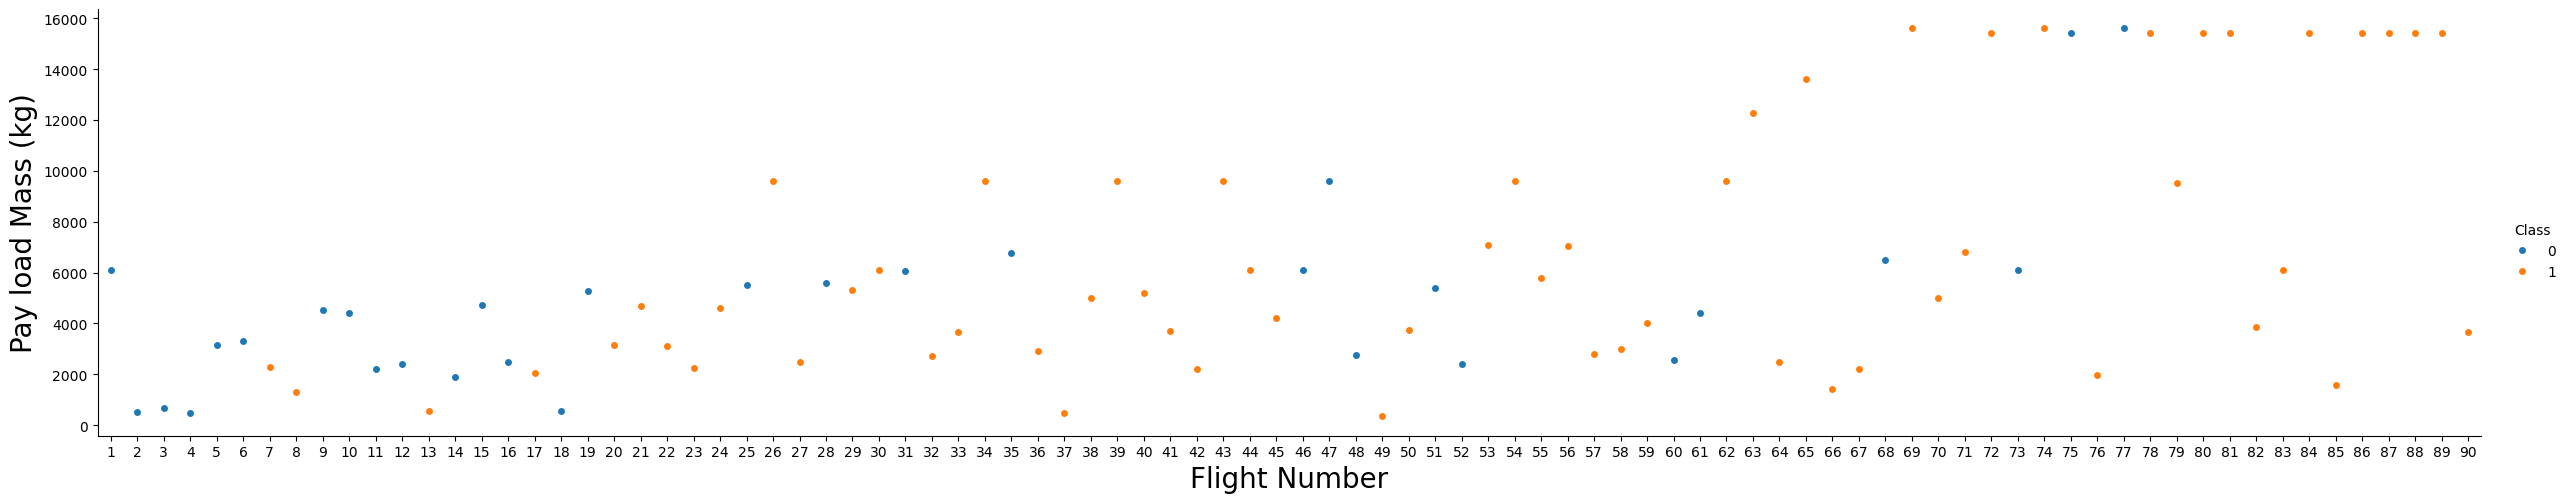

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


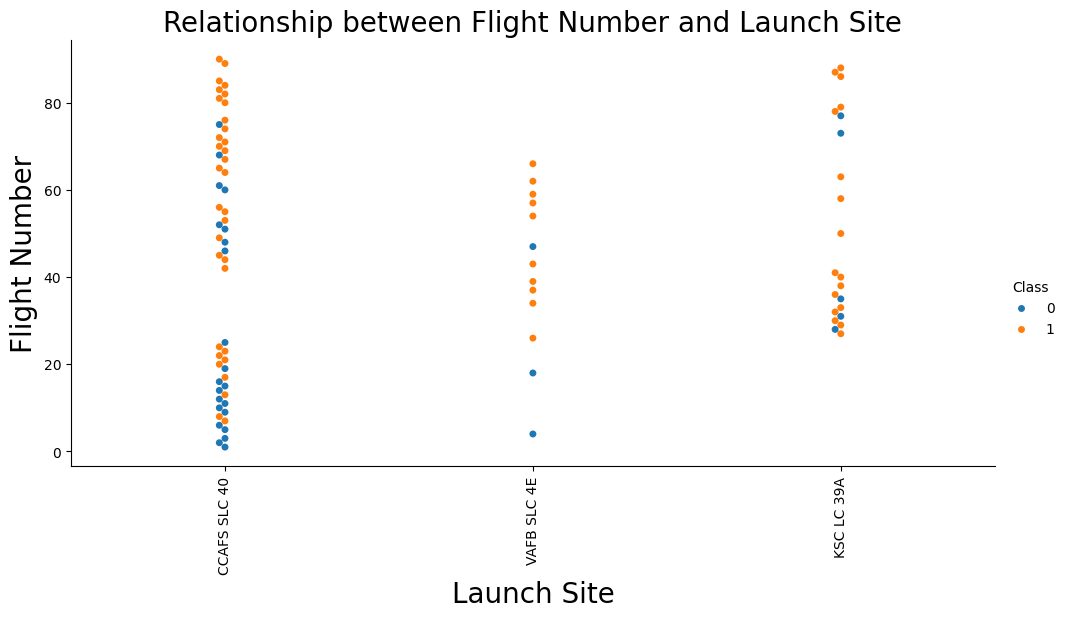

In [6]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site

# Display the first few rows to understand the structure
df.head()

# Create a categorical plot to show the relationship between Flight Number and Launch Site
sns.catplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df, kind="swarm", aspect=2)

# Set the plot labels and title
plt.xlabel("Launch Site", fontsize=20)
plt.ylabel("Flight Number", fontsize=20)
plt.title("Relationship between Flight Number and Launch Site", fontsize=20)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


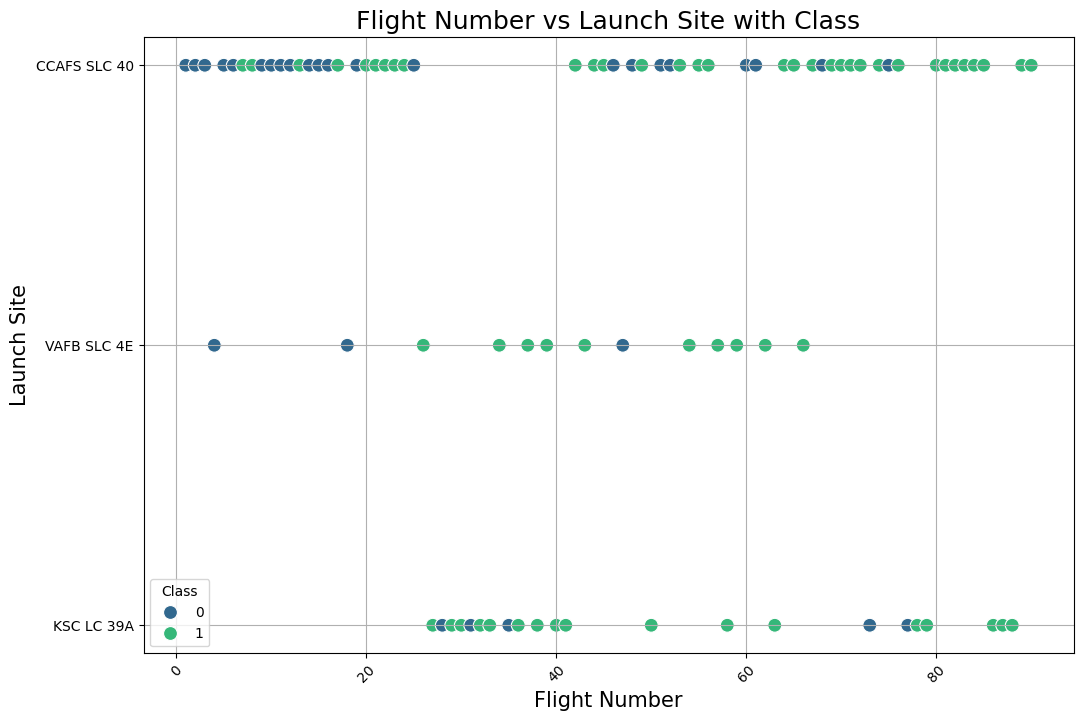

In [7]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows to check the structure
df.head()

# Create a scatter plot with Flight Number on x-axis, Launch Site on y-axis, and hue for Class
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="FlightNumber", y="LaunchSite", hue="Class", palette="viridis", s=100)

# Set the plot labels and title
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs Launch Site with Class", fontsize=18)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for easier data reading

# Show the plot
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


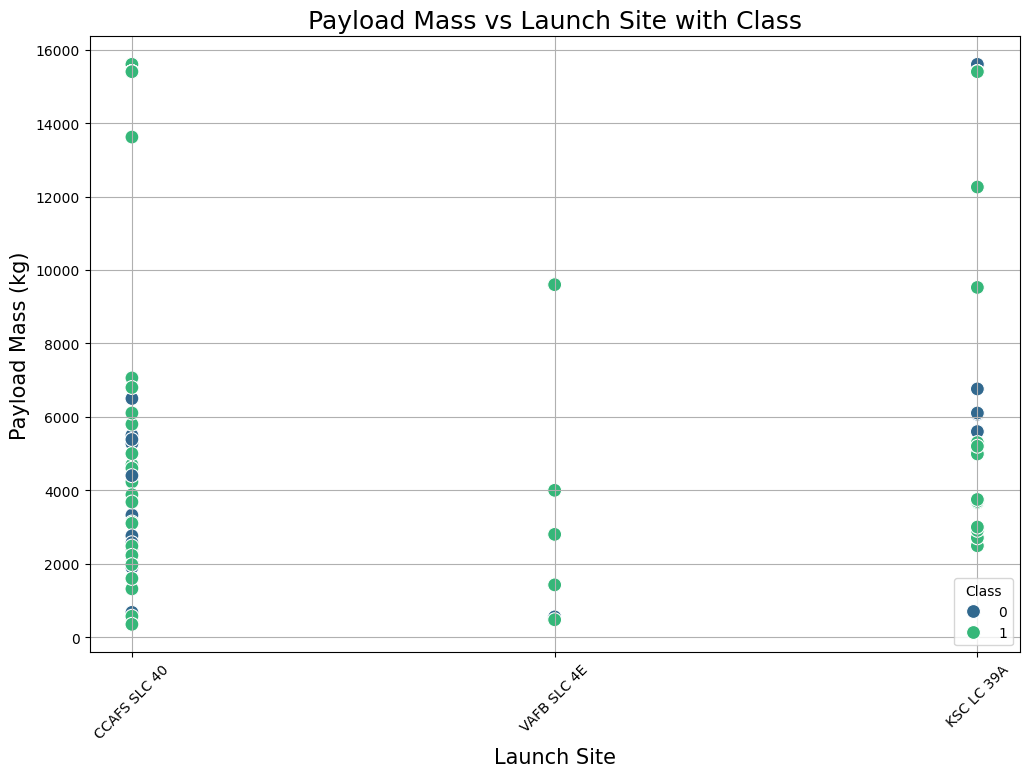

In [8]:
### TASK 2: Visualize the relationship between Payload and Launch Site
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows to check the structure
df.head()

# Create a scatter plot with Launch Site on x-axis, Payload Mass on y-axis, and hue for Class
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="LaunchSite", y="PayloadMass", hue="Class", palette="viridis", s=100)

# Set the plot labels and title
plt.xlabel("Launch Site", fontsize=15)
plt.ylabel("Payload Mass (kg)", fontsize=15)
plt.title("Payload Mass vs Launch Site with Class", fontsize=18)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for easier data reading

# Show the plot
plt.show()


We also want to observe if there is any relationship between launch sites and their payload mass.


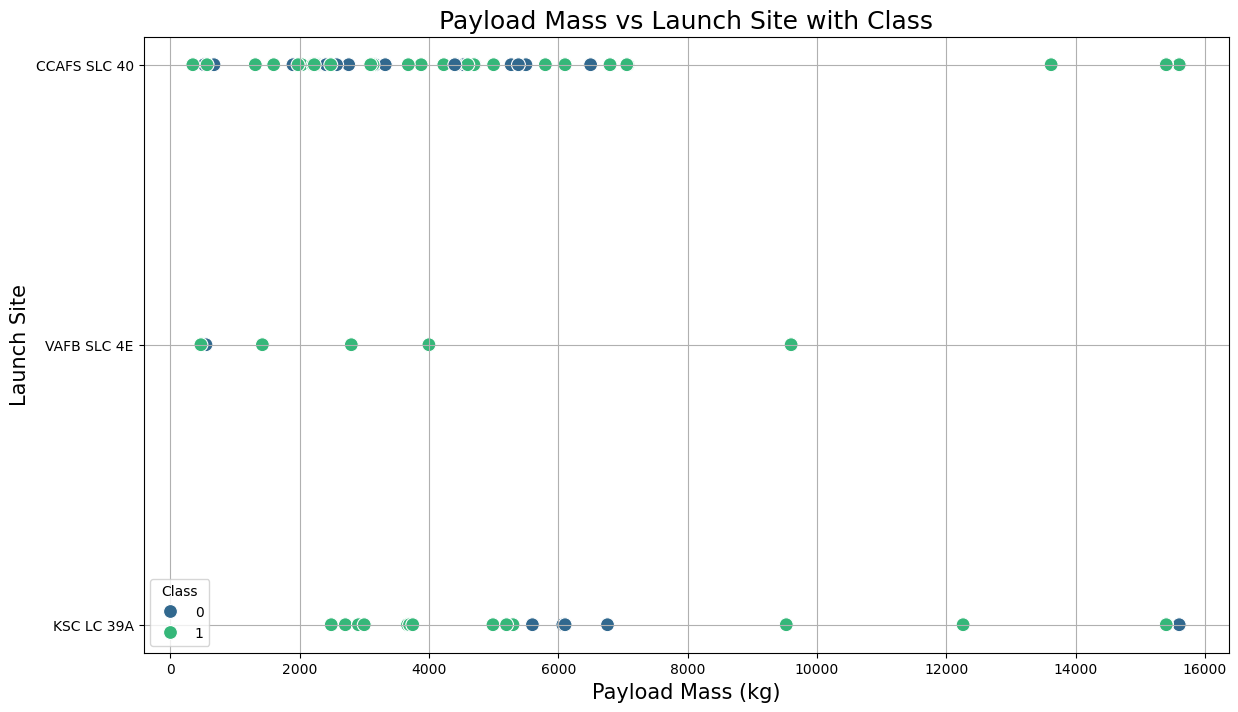

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows to check the structure
df.head()

# Create a scatter plot with Payload Mass on x-axis, Launch Site on y-axis, and hue for Class
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class", palette="viridis", s=100)

# Set the plot labels and title
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Payload Mass vs Launch Site with Class", fontsize=18)
plt.grid(True)  # Add grid lines for easier data reading

# Show the plot
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


<ipython-input-11-fc9058128eff>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate, palette='viridis')


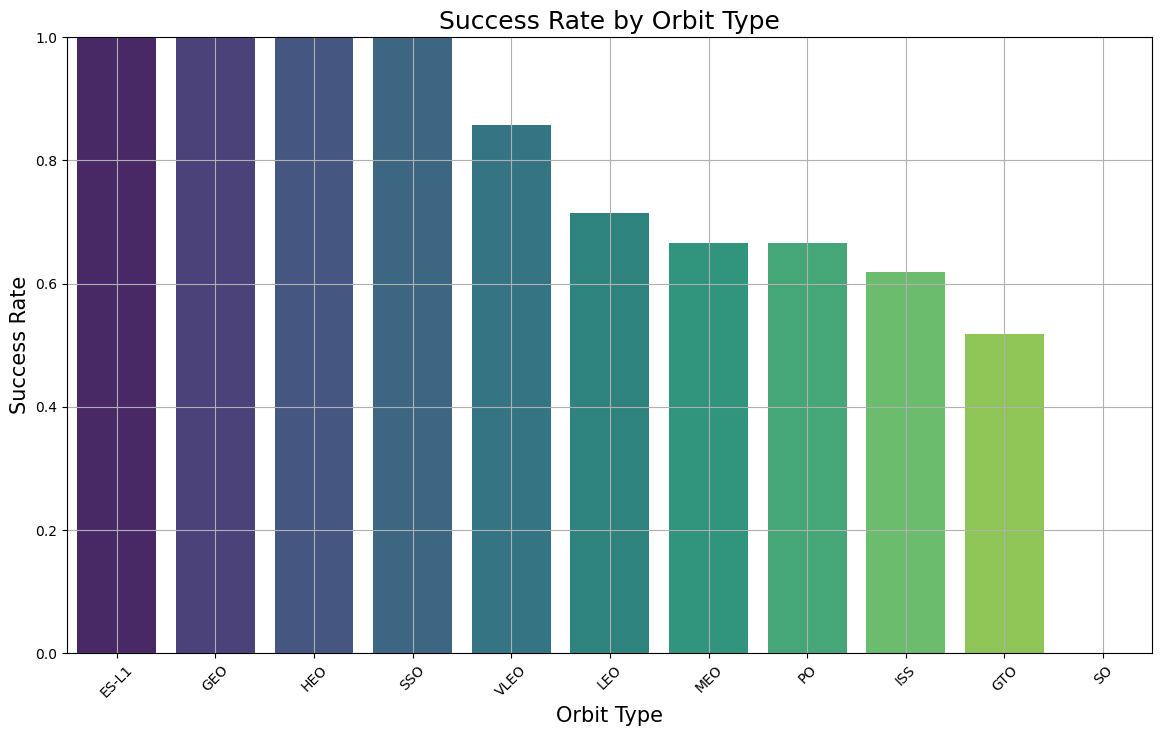

In [11]:
### TASK  3: Visualize the relationship between success rate of each orbit type
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows to check the structure
df.head()

# Calculate success rate for each orbit type
# Group by 'Orbit' and calculate the mean of the 'Class' column (since Class=1 indicates success)
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success_rate.columns = ['Orbit', 'SuccessRate']

# Sort the orbit types by success rate for better visualization
orbit_success_rate = orbit_success_rate.sort_values(by='SuccessRate', ascending=False)

# Plot the success rate for each orbit type
plt.figure(figsize=(14, 8))
sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate, palette='viridis')

# Set the plot labels and title
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=18)
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for percentage representation
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for easier data reading

# Show the plot
plt.show()


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-12-9e86b492ffe5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate, palette='viridis')


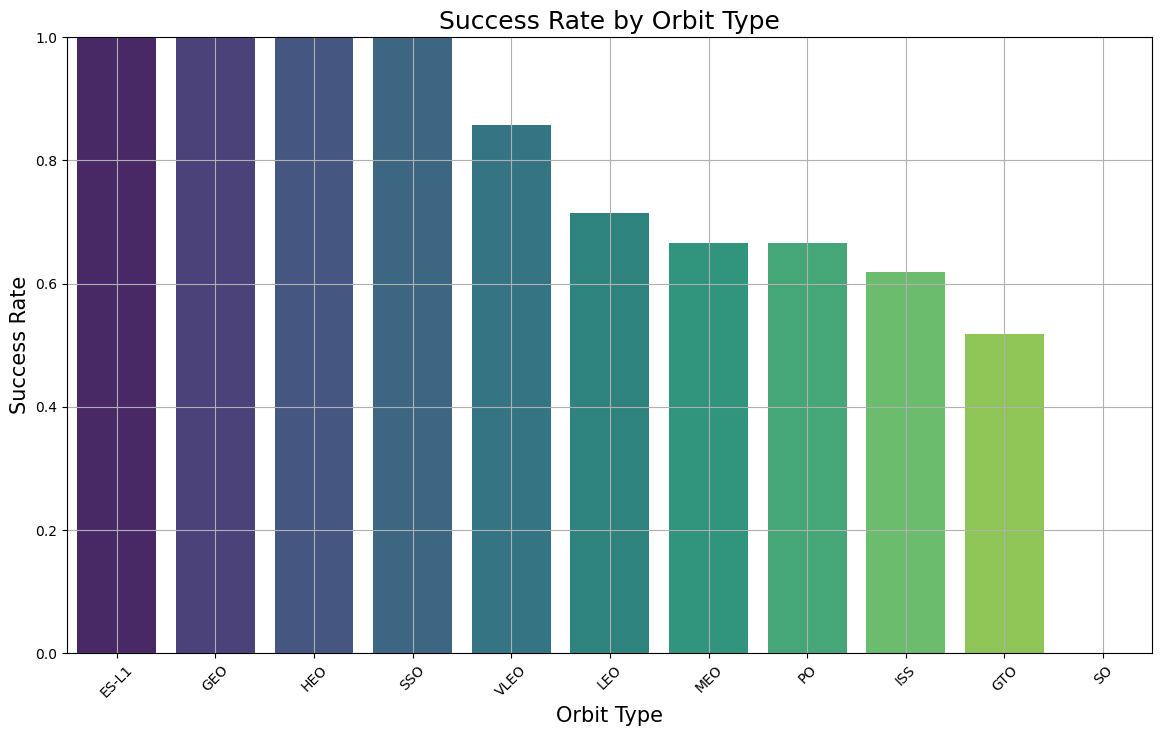

In [12]:
# HINT use groupby method on Orbit column and get the mean of Class column

import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows to check the structure
df.head()

# Calculate success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success_rate.columns = ['Orbit', 'SuccessRate']

# Sort the orbit types by success rate for better visualization
orbit_success_rate = orbit_success_rate.sort_values(by='SuccessRate', ascending=False)

# Plot the success rate for each orbit type
plt.figure(figsize=(14, 8))
sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate, palette='viridis')

# Set the plot labels and title
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=18)
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for percentage representation
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for easier data reading

# Show the plot
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.


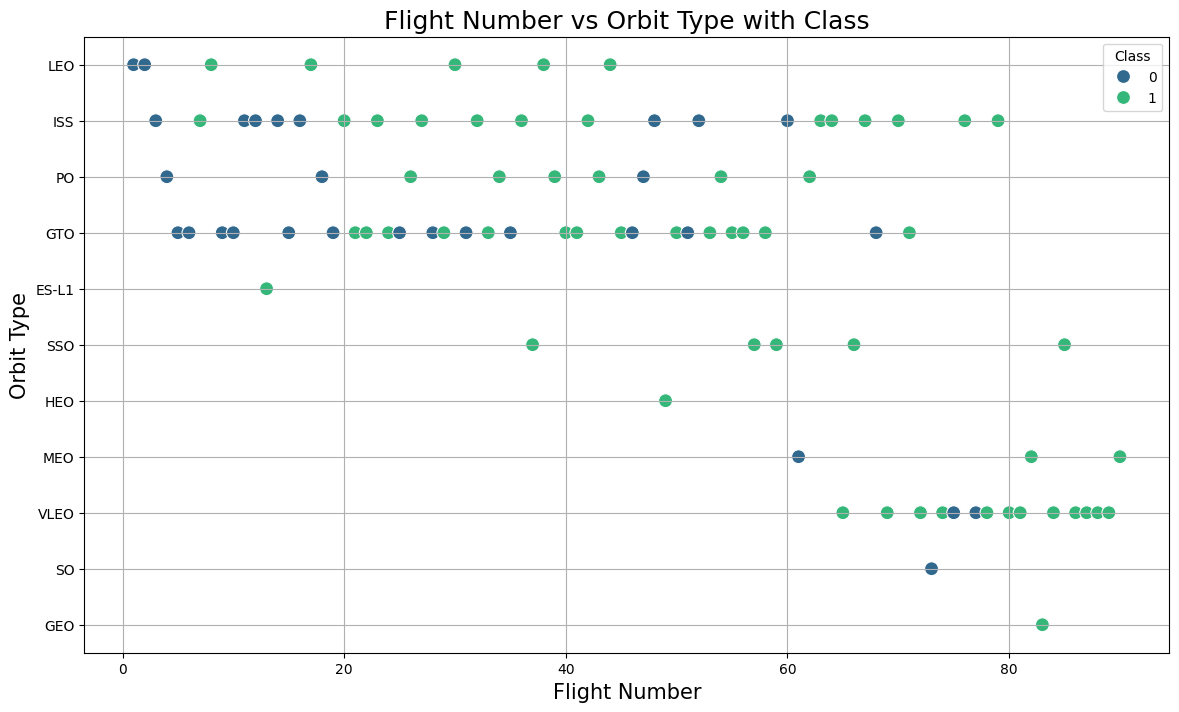

In [22]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type


import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows to check the structure
df.head()

# Create a scatter plot with Flight Number on x-axis, Orbit on y-axis, and hue for Class
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="FlightNumber", y="Orbit", hue="Class", palette="viridis", s=100)

# Set the plot labels and title
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type with Class", fontsize=18)
plt.grid(True)  # Add grid lines for easier data reading

# Show the plot
plt.show()



For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


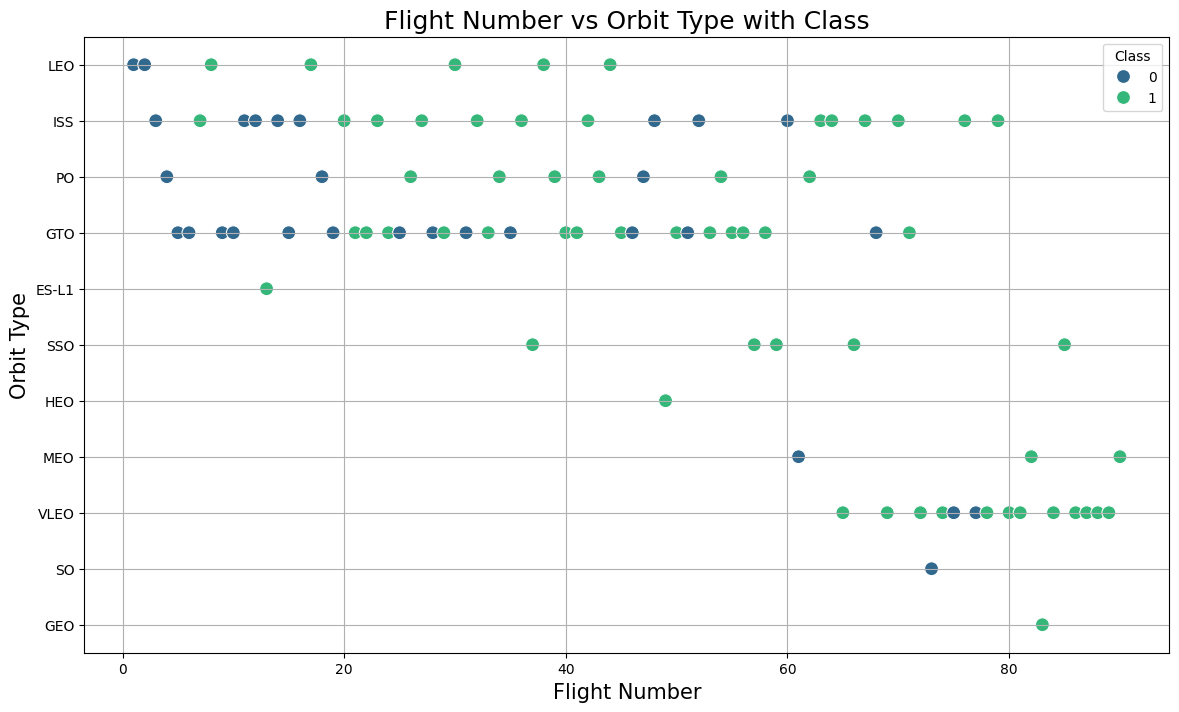

In [14]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows to check the structure
df.head()

# Create a scatter plot with Flight Number on x-axis, Orbit on y-axis, and hue for Class
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="FlightNumber", y="Orbit", hue="Class", palette="viridis", s=100)

# Set the plot labels and title
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type with Class", fontsize=18)
plt.grid(True)  # Add grid lines for easier data reading

# Show the plot
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


<ipython-input-20-69951c0b184c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='AvgPayloadMass', data=orbit_payload_avg, palette='viridis')


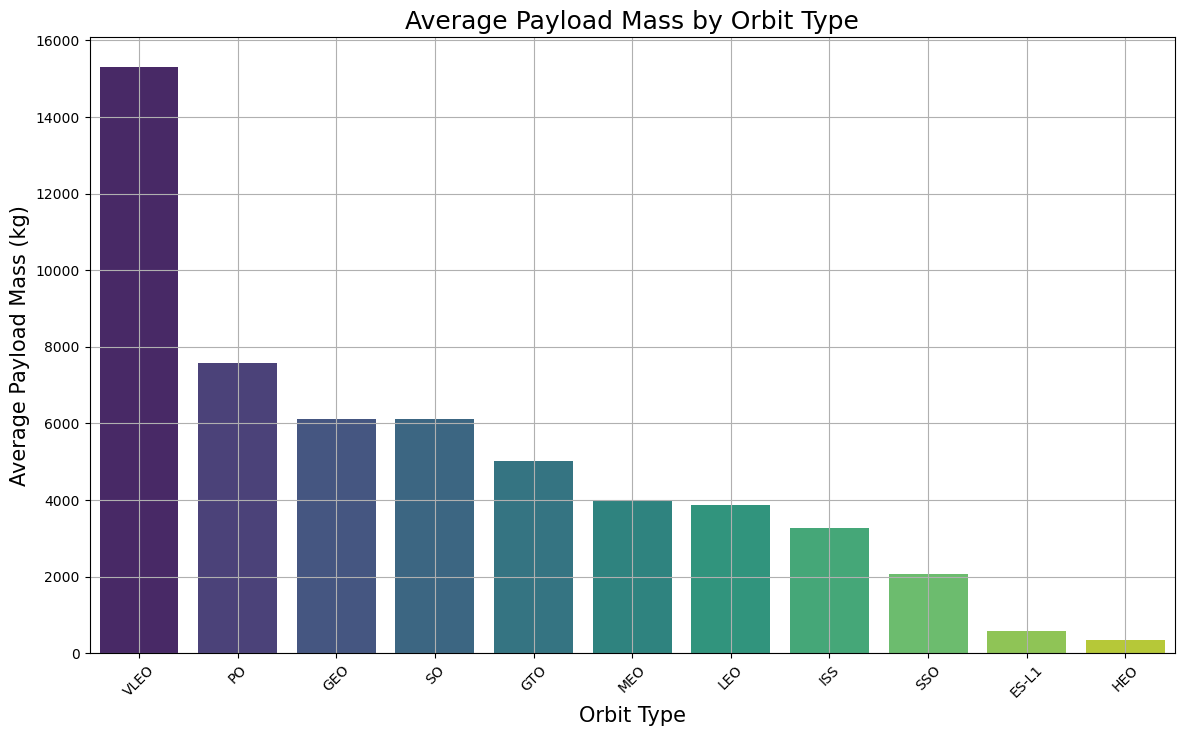

In [20]:
### TASK  5: Visualize the relationship between Payload and Orbit type
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows to check the structure
df.head()

# Calculate the average payload mass for each orbit type
orbit_payload_avg = df.groupby('Orbit')['PayloadMass'].mean().reset_index()
orbit_payload_avg.columns = ['Orbit', 'AvgPayloadMass']

# Sort the orbit types by average payload mass for better visualization
orbit_payload_avg = orbit_payload_avg.sort_values(by='AvgPayloadMass', ascending=False)

# Create a bar plot with Orbit on x-axis and average Payload Mass on y-axis
plt.figure(figsize=(14, 8))
sns.barplot(x='Orbit', y='AvgPayloadMass', data=orbit_payload_avg, palette='viridis')

# Set the plot labels and title
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Average Payload Mass (kg)", fontsize=15)
plt.title("Average Payload Mass by Orbit Type", fontsize=18)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for better visualization

# Show the plot
plt.show()



Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


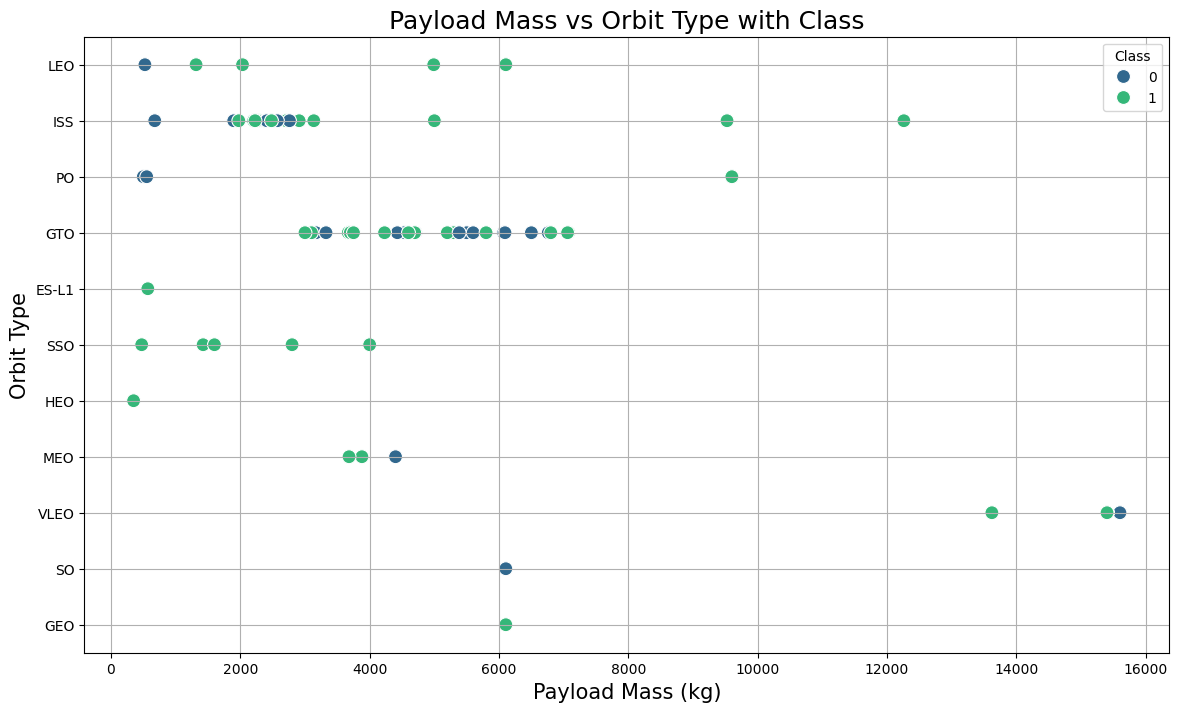

In [19]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value


import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the dataset is loaded and check the first few rows
df.head()

# Create a scatter plot with Payload Mass on x-axis, Orbit on y-axis, and hue for Class
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="PayloadMass", y="Orbit", hue="Class", palette="viridis", s=100)

# Set the plot labels and title
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Payload Mass vs Orbit Type with Class", fontsize=18)
plt.grid(True)  # Add grid lines for better visualization

# Show the plot
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


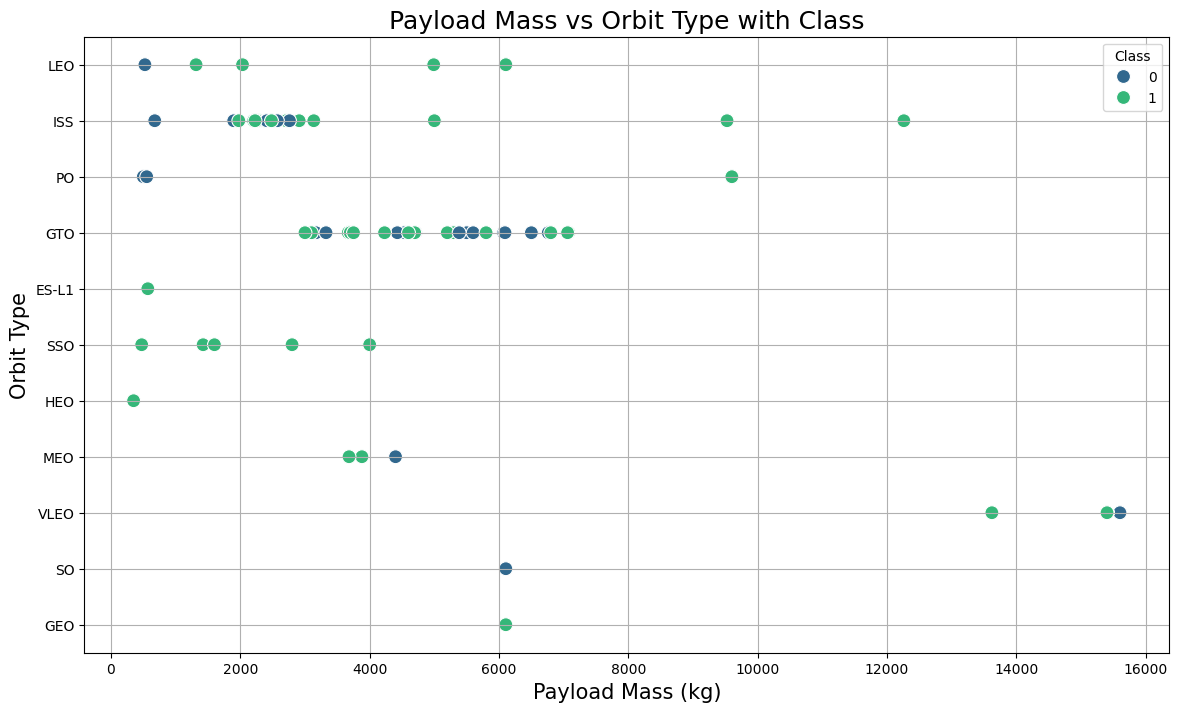

In [17]:
### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [23]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


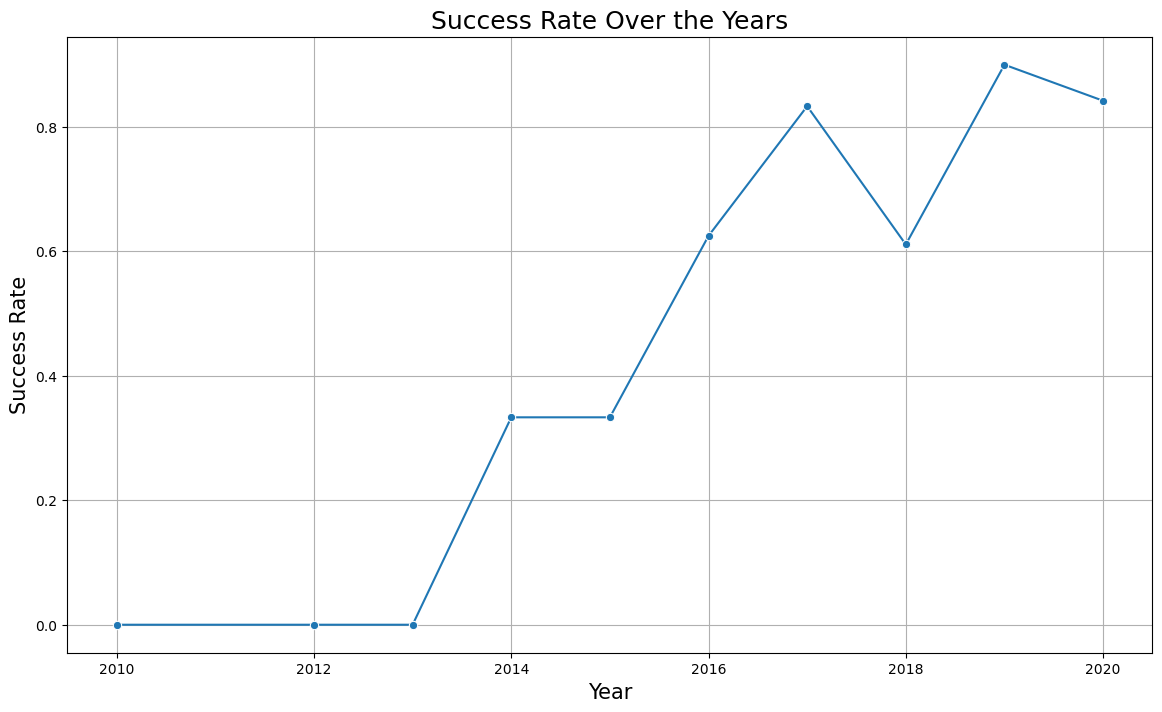

In [27]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

# Function to extract the year from the date
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Apply the function to extract the year
Extract_year()
df['Year'] = year

# Check the first few rows to ensure the year extraction is correct
df.head()

# Calculate the success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()
yearly_success_rate.columns = ['Year', 'SuccessRate']

# Convert Year to numeric type for plotting purposes
yearly_success_rate['Year'] = pd.to_numeric(yearly_success_rate['Year'])

# Sort the DataFrame by Year
yearly_success_rate = yearly_success_rate.sort_values(by='Year')

# Plot the line chart
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_success_rate, x='Year', y='SuccessRate', marker='o', linestyle='-')

# Set the plot labels and title
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate Over the Years", fontsize=18)
plt.grid(True)  # Add grid lines for better visualization

# Show the plot
plt.show()



you can observe that the sucess rate since 2013 kept increasing till 2020


In [28]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [29]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [30]:
### TASK  7: Create dummy variables to categorical columns


import pandas as pd

# Display the first few rows to understand the structure
df.head()

# Identify the categorical columns
# For example, let's choose 'LaunchSite', 'Orbit', and 'BoosterVersion' as the categorical columns
categorical_columns = ['LaunchSite', 'Orbit', 'BoosterVersion']

# Create dummy variables for the categorical columns
dummies = pd.get_dummies(df[categorical_columns], drop_first=True)

# Check the first few rows of the dummy variables
dummies.head()

# Drop the original categorical columns from the dataframe
df = df.drop(categorical_columns, axis=1)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummies], axis=1)

# Display the first few rows of the updated dataframe to verify the changes
df.head()


,FlightNumber,Date,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO
0,1,2010,6104.959412,None None,1,False,False,False,NaN,1.0,...,0,0,0,0,1,0,0,0,0,0
1,2,2012,525.000000,None None,1,False,False,False,NaN,1.0,...,0,0,0,0,1,0,0,0,0,0
2,3,2013,677.000000,None None,1,False,False,False,NaN,1.0,...,0,0,0,1,0,0,0,0,0,0
3,4,2013,500.000000,False Ocean,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2013,3170.000000,None None,1,False,False,False,NaN,1.0,...,0,1,0,0,0,0,0,0,0,0


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [34]:
# HINT: Use get_dummies() function on the categorical columns

# Check the available columns in the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

# Display the first few rows to understand the structure
df.head()


# Check the available columns in the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

# Adjust this list based on the actual column names in your dataset
# Verify and confirm the exact names of the columns to encode
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Ensure the columns exist in the DataFrame
for col in categorical_columns:
    if col not in df.columns:
        print(f"Warning: Column '{col}' is not found in the DataFrame.")

# Use get_dummies to create dummy variables for these categorical columns if they exist
if all(col in df.columns for col in categorical_columns):
    features_one_hot = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    # Display the first few rows of the resulting dataframe
    print("\nDataFrame with OneHotEncoded features:")
    print(features_one_hot.head())
else:
    print("Some specified columns were not found in the DataFrame. Please check the column names.")



Columns in the DataFrame:
Index(['FlightNumber', 'Date', 'PayloadMass', 'Outcome', 'Flights', 'GridFins',
       'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial',
       'Longitude', 'Latitude', 'Class', 'Year', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO',
       'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO',
       'Orbit_SSO', 'Orbit_VLEO'],
      dtype='object')
Columns in the DataFrame:
Index(['FlightNumber', 'Date', 'PayloadMass', 'Outcome', 'Flights', 'GridFins',
       'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial',
       'Longitude', 'Latitude', 'Class', 'Year', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO',
       'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO',
       'Orbit_SSO', 'Orbit_VLEO'],
      dtype='object')
Some specified columns were not found in the DataFrame. Please check the column names.


In [35]:
### TASK  8: Cast all numeric columns to `float64`

# Display the first few rows to check the structure
print("Original DataFrame:")
print(df.head())

# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Cast all numeric columns to float64
df[numeric_columns] = df[numeric_columns].astype('float64')

# Verify the data types to ensure the conversion
print("\nData Types after casting numeric columns to float64:")
print(df.dtypes)

# Display the first few rows of the updated DataFrame to verify the changes
print("\nUpdated DataFrame with numeric columns cast to float64:")
print(df.head())


Original DataFrame:
   FlightNumber  Date  PayloadMass      Outcome  Flights  GridFins  Reused  \
0             1  2010  6104.959412    None None        1     False   False   
1             2  2012   525.000000    None None        1     False   False   
2             3  2013   677.000000    None None        1     False   False   
3             4  2013   500.000000  False Ocean        1     False   False   
4             5  2013  3170.000000    None None        1     False   False   

    Legs LandingPad  Block  ...  Orbit_GEO Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0  False        NaN    1.0  ...          0         0          0          0   
1  False        NaN    1.0  ...          0         0          0          0   
2  False        NaN    1.0  ...          0         0          0          1   
3  False        NaN    1.0  ...          0         0          0          0   
4  False        NaN    1.0  ...          0         1          0          0   

   Orbit_LEO Orbit_MEO  Orbit_PO  Orbit_SO

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [48]:
# HINT: use astype function

import pandas as pd

df.head()
# Print the column names to verify
print("Columns in the DataFrame:")
print(df.columns)

# Display the first few rows to understand the structure and sample data
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Update this list based on the actual column names found in the DataFrame
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']  # Adjust these names as per your DataFrame

# Check if these columns exist in the DataFrame
for col in categorical_columns:
    if col not in df.columns:
        print(f"Warning: Column '{col}' is not found in the DataFrame.")

# Apply one-hot encoding if all columns are found
if all(col in df.columns for col in categorical_columns):
    features_one_hot = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

    # Display the first few rows to check the structure
    print("\nDataFrame with OneHotEncoded features:")
    print(features_one_hot.head())

    # Select only the numeric columns
    numeric_columns = features_one_hot.select_dtypes(include=['number']).columns

    # Cast only the numeric columns to float64
    features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

    # Verify the data types after casting
    print("\nData Types after casting numeric columns to float64:")
    print(features_one_hot.dtypes)

    # Display the first few rows of the updated DataFrame to verify the changes
    print("\nUpdated DataFrame with numeric columns as float64:")
    print(features_one_hot.head())
else:
    print("Some specified columns were not found in the DataFrame. Please check the column names.")



Columns in the DataFrame:
Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

First few rows of the DataFrame:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN 

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [49]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
